In [1]:
%load_ext autoreload
%autoreload 2

## Esercizio: Controllo di Frenata

**Si desidera progettare la curva di controllo della velocità in frenata di un carrello automatico in un magazzino.**

<center>
<img src="assets/brake_control.png" width=30%/>
</center>

In altre parole, occorre progettare come la velocità deve variare nel tempo: si assuma per semplicità che il sistema sia dotato di attuatori in grado di mantenere in ogni momento la velocità desiderata.

**La curva di velocità deve soddisfare le seguenti condizioni:**

* In corrispondenza dell’istante iniziale $t_0 = 0$ la curva abbia un valore noto $v_0$ (la velocità di crociera del mezzo)
* In corrispondenza dell’istante t1 la curva deve valere $v_1 = 0$
* La derivata in $t_0$ e $t_1$ sia nulla (perché la frenata non sia troppo brusca)

La curva di velocità deve essere descritta da un polinomio di 3° grado, i.e.:

$$
\alpha_3 t^3 + \alpha_2 t^2 + \alpha_1 t + \alpha_0
$$

## Esercizio 1

**Nel modulo `sol.brake` definire la funzione**

```python
def find_curve_params(t1):
    # Parametri fissi
    t0 = 0
    v0 = 5.5
    v1 = 0
    ...
```

* Alcuni parametri del problema (quelli indicati) saranno considerati fissi nel tema d'esame
* La funzione deve determinare i parametri della curva (i coefficienti dei termini monomiali) in modo da soddisfare le condizioni
* La funzione deve restituire nell'ordine $\alpha_3, \alpha_2, \alpha_1, \alpha_0$

Si collaudi la funzione per $t_1 = 3$.

**Nel modulo `sol.brake` definire la funzione:**

```python
def curve(a3, a2, a1, a0, t):
    ...
```

* La funzione riceve in ingresso i valori di $\alpha_3, \alpha_2, \alpha_1, \alpha_0$ ed una sequenza di valori per $t$
* La funzione deve calcolare e restituire i valori della curva per ciascuni dei valori di $t$ passati

Per verificare la correttezza, si suggerisce di disegnare la curva nell'intervallo per $t$ compreso tra $0$ e $3$, utilizzando la fuzione `base.util.plot` inclusa con il tema d'esame.

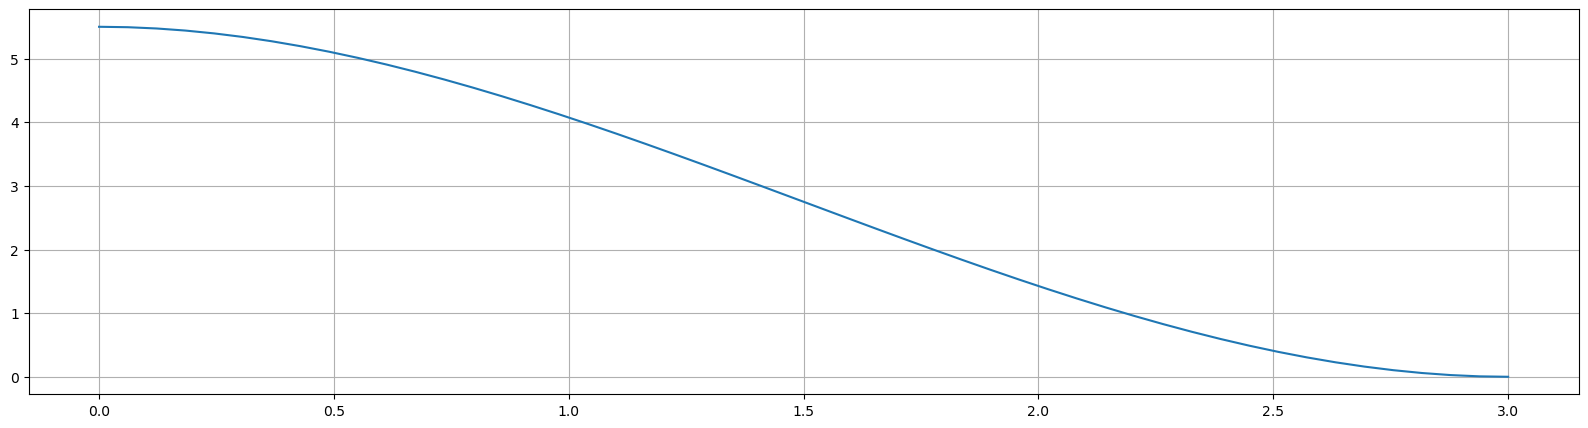

In [2]:
from sol import brake
from base import util
import numpy as np

a3, a2, a1, a0 = brake.find_curve_params(t1=3)
t = np.linspace(0, 3)
util.plot(t, brake.curve(a3, a2, a1, a0, t), figsize=(20, 5))

## Esercizio 2

**Si assuma che il parametro $\alpha_3$ debba avere un valore fisso, ma che sia possiamo regolare il tempo di frenata per continuare a soddisfare le condizioni indicate nel testo**

Il problema risultante può essere formulato come un sistema di equazioni non lineari:

$$\begin{align}
\alpha_3 t_0^3 + \alpha_2 t_0^2 + \alpha_1 t_0 + \alpha_0 - v_0 &= 0 \\
\alpha_3 t_1^3 + \alpha_2 t_1^2 + \alpha_1 t_1 + \alpha_0 - v_1 &= 0 \\
3 \alpha_3 t_0^2 + 2 \alpha_2 t_0 + \alpha_1 &= 0 \\
3 \alpha_3 t_1^2 + 2 \alpha_2 t_1 + \alpha_1 &= 0 \\
\end{align}$$

Dove le variabili sono $\alpha_2, \alpha_1, \alpha_0$ e $t_1$. Si noti che $\alpha_3$ _non_ è una variabile.

**Nel modulo `sol.brake` si definisca la funzione:**

```python
def find_curve_params2_aux(X): 
    # Parametri fissi
    t0 = 0
    v0 = 5.5
    v1 = 0
    a3 = 0.171875
    ...
```

* La funzione deve calcolare e restituire i valori delle 4 espressioni che devono azzerarsi perché le equazioni siano soddisfatte

**Nel modulo `sol.brake` si definisca la funzione:**

```python
def find_curve_params2():
    X0 = [-1, 0.2, 6.0, 4.5]
    ...
```

* La funzione deve calcolare i valori di $\alpha_2, \alpha_1, \alpha_0, t_1$ per cui la curva soddisfi le condizioni richieste
* A tal fine, si utilizzi la funzione `scipy.optimize.fsolve`, con la stima iniziale fornite nel codice
* La funzione deve restituire nell'ordine $\alpha_2, \alpha_1, \alpha_0, t_1$

Per verificare la correttezza, si suggerisce di disegnare la curva nell'intervallo per $t$ compreso tra $0$ e $4$, utilizzando la fuzione `base.util.plot` inclusa con il tema d'esame.

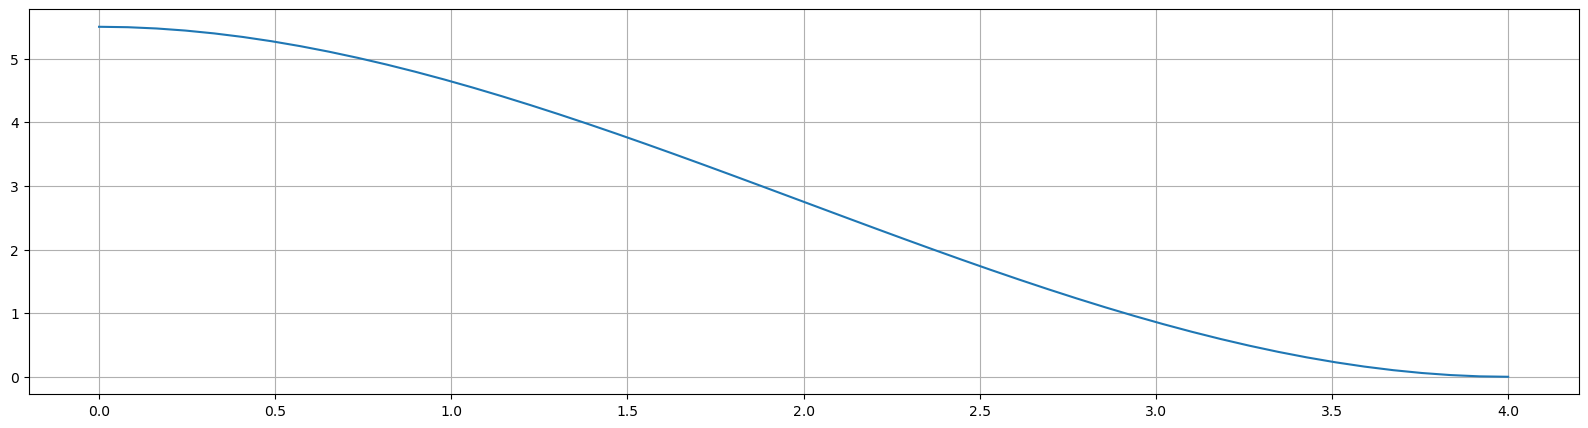

In [3]:
a2b, a1b, a0b, t1b = brake.find_curve_params2()
tb = np.linspace(0, t1b)
util.plot(tb, brake.curve(0.171875, a2b, a1b, a0b, tb), figsize=(20, 5))

## Esercizio 3

**Assumento $t_0 = 0$, lo spazio di frenata può essere calcolato come:**

$$
S(t) = \frac{1}{4}\alpha_3 t^4 + \frac{1}{3}\alpha_2 t^3 + \frac{1}{2}\alpha_1 t^2 + \alpha_0 t
$$

**Nel modulo `sol.brake` si definisca la funzione:**

```python
def braking_distance(t1):
    ...
```

* La funzione riceve in ingresso un valore di $t_1$
* Quindi, deve determinare i parametri della curva utilizzando `sol.find_curve_params` (definita nell'esercizio 1)
* La funzione deve restituire lo spazio di frenata

**È possibile calibrare il valore di $t_1$ in modo da ottenere una determinato spazio di frenata, risolvendo l'equazione:**

$$
F(t_1) = S(t_1) - S^* = 0
$$

Dove $S(t_1)$ è lo spazio di frenata (calcolato come indicato sopra) e $S^*$ è il valore desiderato

**Nel modulo `sol.brake` si definisca la funzione:**

```python
def find_t1_aux(t1):
    ...
```

* La funzione deve restituire il valore di $F(t_1)$ con $S^* = 10$

**Nel modulo `sol.brake` si definisca la funzione:**

```python
def find_t1():
    a, b = 3, 12
    ...
```

* La funzione deve calcolare e restituire il valore di $t_1$ perché lo spazio di frenata sia pari a $10$ metri
* A tale fine, si utilizzi la funzione `scipy.optimize.brentq`

In [4]:
from base import util

t1_sol = brake.find_t1()
print(f't1_sol: {t1_sol}')

t1_sol: 3.6363636363636362
